In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# %matplotlib inline

In [15]:
data = pd.read_csv("data/movie_metadata_cleaned.csv")

In [16]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

                       count
1    Steven Spielberg     26
2         Woody Allen     22
3      Clint Eastwood     20
4     Martin Scorsese     20
5        Ridley Scott     17
6   Steven Soderbergh     16
7           Spike Lee     16
8          Tim Burton     16
9        Renny Harlin     15
10       Oliver Stone     14


{'whiskers': [<matplotlib.lines.Line2D at 0x213a6312e80>,
 'caps': [<matplotlib.lines.Line2D at 0x213a6322610>,
 'boxes': [<matplotlib.lines.Line2D at 0x213a6312af0>],
 'medians': [<matplotlib.lines.Line2D at 0x213a6322d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x213a632b100>],
 'means': []}

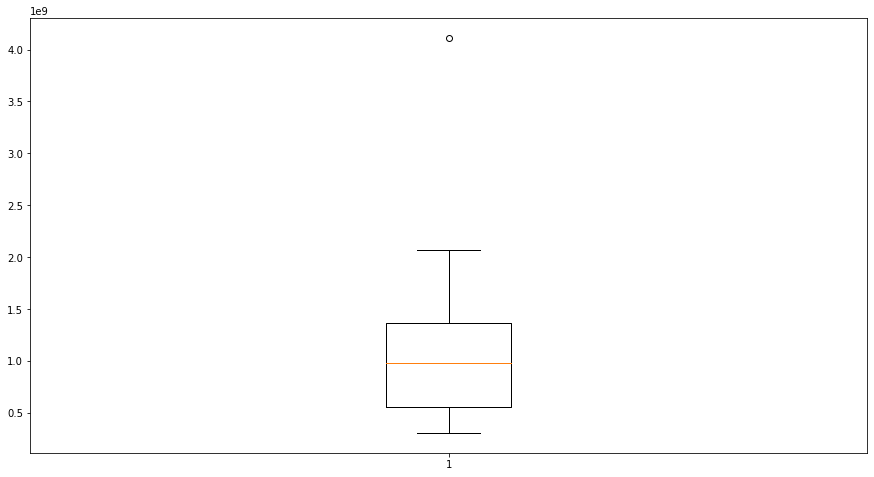

In [224]:
#Group data by director name and get their gross earnings and the number of movies directed
top10_directors=data.groupby(['director_name'],as_index=False).agg({'gross':['sum','count']})
top10_directors.columns = top10_directors.columns.droplevel(0)

#Getting the top 10 directors with most movies
sorted_top10_directors= top10_directors.sort_values(by="count", ascending=False).reset_index(drop=True)[1:11]
print(sorted_top10_directors[['','count']])

#plot the gross earnings in a boxplot
fig = plt.figure(figsize=(15,8))
plt.boxplot(sorted_top10_directors['sum'])



## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

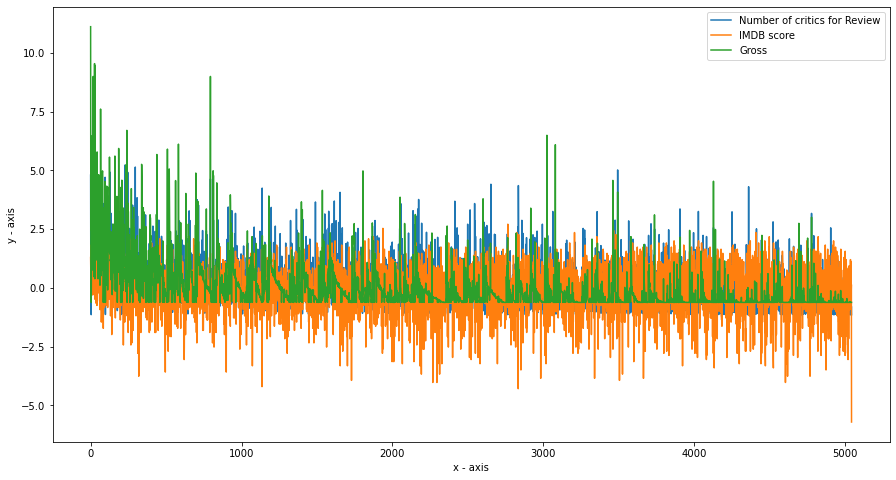

In [225]:
#normalize the variables
mean_reviews = data['num_critic_for_reviews'].mean()
num_reviews = data['num_critic_for_reviews'] - mean_reviews
Z_reviews = num_reviews/data['num_critic_for_reviews'].std()

mean_imdb = data['imdb_score'].mean()
num_imdb = data['imdb_score'] - mean_imdb
Z_imdb = num_imdb/data['imdb_score'].std()

mean_gross = data['gross'].mean()
num_gross = data['gross'] - mean_gross
Z_gross = num_gross/data['gross'].std()


fig = plt.figure(figsize=(15,8))
plt.plot(Z_reviews,label="Number of critics for Review")
plt.plot(Z_imdb,label="IMDB score")
plt.plot(Z_gross,label="Gross")

# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
plt.legend()
plt.show()

## Compute Sales (Gross - Budget), add it as another column

In [128]:
data['sales'] = data['gross'] - data['budget']

data

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0,584.333333
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0,0.000000
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0,718.000000
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0,41.666667


## Which directors garnered the most total sales?

In [226]:
top_sales = data.groupby('director_name',as_index=False).sum().sort_values(by="sales", ascending=False)
top_sales[['director_name','sales']].iloc[:10]

,director_name,sales
2159,Steven Spielberg,2.451332e+09
765,George Lucas,1.386641e+09
923,James Cameron,1.199626e+09
1219,Joss Whedon,1.000887e+09
335,Chris Columbus,9.417076e+08
1787,Peter Jackson,9.009693e+08
2221,Tim Burton,8.242755e+08
374,Christopher Nolan,8.082276e+08
1158,Jon Favreau,7.693815e+08
695,Francis Lawrence,7.555020e+08


## Plot sales and average likes as a scatterplot. Fit it with a line.

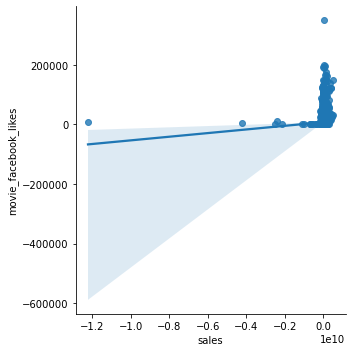

In [227]:
sns.lmplot(x='sales',y='movie_facebook_likes',data=data,fit_reg=True) 

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

In [228]:
top_genres= data.groupby('genres')["sales"].sum()
top_genres.nlargest(n=10)

genres
Comedy                                       3.410157e+09
Comedy|Romance                               2.529578e+09
Action|Adventure|Fantasy|Sci-Fi              2.394717e+09
Action|Adventure|Sci-Fi                      2.152709e+09
Comedy|Drama|Romance                         1.611889e+09
Adventure|Animation|Comedy|Family|Fantasy    1.398613e+09
Comedy|Drama                                 1.222683e+09
Drama|Romance                                1.183729e+09
Horror                                       1.147044e+09
Action|Adventure|Thriller                    1.140988e+09
Name: sales, dtype: float64

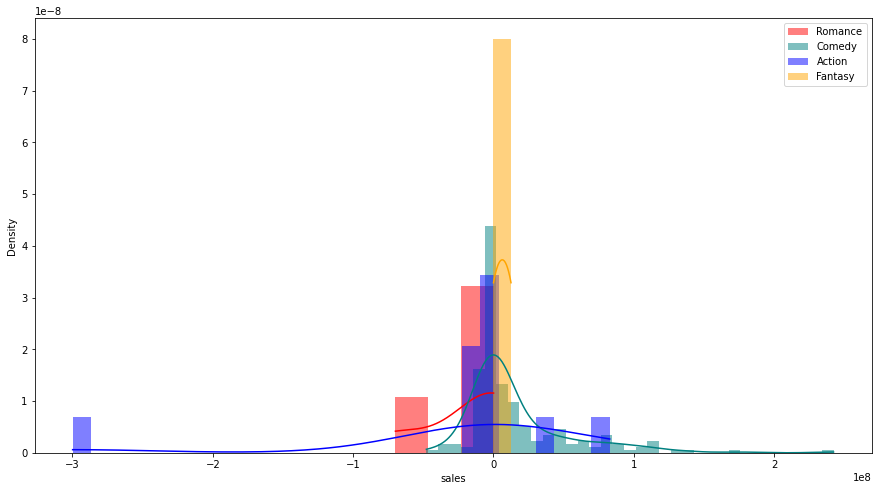

In [229]:
plt.figure(figsize = (15,8))
ax = sns.histplot(data[data['genres'] == 'Romance']["sales"], color="red", label="Romance", kde=True, stat="density", linewidth=0)
sns.histplot(data[data['genres'] == 'Comedy']["sales"], color="teal", label="Comedy", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['genres'] == 'Action']["sales"], color="blue", label="Action", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['genres'] == 'Fantasy']["sales"], color="orange", label="Fantasy", kde=True, stat="density", linewidth=0, ax=ax)
ax.legend()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [230]:
data['average_actor_likes']= data[['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']].mean(axis=1)
data[['movie_title','average_actor_likes']]

,movie_title,average_actor_likes
0,b'Avatar',930.333333
1,"b""Pirates of the Caribbean: At World's End""",15333.333333
2,b'Spectre',3851.333333
3,b'The Dark Knight Rises',24333.333333
4,b'Star Wars: Episode VII - The Force Awakens ...,47.666667
...,...,...
5039,b'The Following ',584.333333
5040,b'A Plague So Pleasant',0.000000
5041,b'Shanghai Calling',718.000000
5042,b'My Date with Drew',41.666667


## Copying the whole dataframe

In [64]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [231]:
#Filter the data to get the columns with numbers
filter = df.select_dtypes(include='number')

#Find the max for each numeric column
max = filter.max()
#Find the min for each numeric column
min = filter.min()

#Solve for the Min-Max Normalization
normalized_data= (filter - min) / (max-min)
normalized_data

,Unnamed: 0,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0.000000,0.889299,0.941799,0.000000,0.037174,0.001563,1.000000,0.524454,0.007361,0.000000,0.603557,1.940158e-02,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.004261
1,0.000198,0.371464,0.894180,0.024478,0.043478,0.062500,0.406840,0.278867,0.073622,0.000000,0.244664,2.455896e-02,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.070229
2,0.000397,0.740467,0.783069,0.000000,0.007000,0.017188,0.263080,0.163258,0.017816,0.023256,0.196443,2.005649e-02,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.017640
3,0.000595,1.000000,0.867725,0.956522,1.000000,0.042188,0.589253,0.677217,0.162561,0.000000,0.533794,2.046580e-02,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.111450
4,0.000793,0.000000,0.000000,0.005696,0.000000,0.000205,0.000000,0.000005,0.000218,0.000000,0.000000,0.000000e+00,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,0.999207,0.052891,0.227513,0.000000,0.013870,0.001314,0.000000,0.043698,0.002669,0.023256,0.070949,0.000000e+00,0.000000,0.004328,0.789474,1.000000,0.091691,0.958898,0.002676
5040,0.999405,0.015990,0.402116,0.000000,0.000000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000593,1.146085e-07,0.998512,0.000000,0.663158,0.000000,0.000046,0.958898,0.000000
5041,0.999603,0.017220,0.529101,0.000000,0.021261,0.001478,0.000014,0.000743,0.003633,0.116279,0.001779,0.000000e+00,0.998016,0.005248,0.663158,0.146875,0.001891,0.958899,0.003289
5042,0.999802,0.052891,0.476190,0.000696,0.000696,0.000134,0.000112,0.002536,0.000248,0.000000,0.016601,9.004953e-08,0.994048,0.000168,0.694737,0.115625,0.001307,0.958905,0.000191
